##**Outliers:**
Data points that stand out from the rest of the dataset are known as outliers. The data distribution is frequently skewed by these anomalous observations, which are frequently the result of inaccurate observations or incorrect data entry.

It's crucial to find and eliminate outliers in order to guarantee that the trained model generalises well to the acceptable range of test inputs.`


In [ ]:
import numpy as np
import pandas as  pd
import seaborn as sns

In [ ]:
def generate_scores(mean=60,std_dev=12,num_samples=200):
    np.random.seed(27)
    scores =np.random.normal(loc=mean,scale=std_dev,size=num_samples)
    scores = np.round(scores,decimals=0)
    return scores
scores_data = generate_scores()

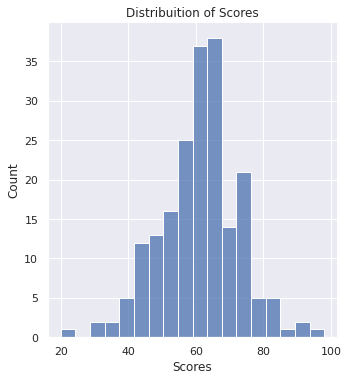

In [ ]:
sns.set_theme()
sns.displot(data =scores_data).set(title = "Distribuition of Scores", xlabel = "Scores")

In [ ]:
df_scores = pd.DataFrame(scores_data,columns =['score'])

In [ ]:
lower_limit = df_scores.mean() - 3*df_scores.std()
upper_limit = df_scores.mean() + 3*df_scores.std()
print(lower_limit)
print(upper_limit)



score    25.441697
dtype: float64
score    96.568303
dtype: float64


In [ ]:
print(df_scores)

     score
0     75.0
1     56.0
2     67.0
3     65.0
4     63.0
..     ...
195   76.0
196   67.0
197   74.0
198   98.0
199   53.0

[200 rows x 1 columns]


In [ ]:
# code for Outlier Detection Using Standard Deviation
df_scores_filtered = df_scores[(df_scores[['score']]>lower_limit)&(df_scores[['score']]<upper_limit)]
print(df_scores_filtered) 

     score
0     75.0
1     56.0
2     67.0
3     65.0
4     63.0
..     ...
195   76.0
196   67.0
197   74.0
198    NaN
199   53.0

[200 rows x 1 columns]


In [ ]:
# Code for outlier detection using z-score
df_scores['z_score'] = (df_scores['score'] - df_scores['score'].mean())/df_scores['score'].std()
df_scores.head()  

,score,z_score
0,75.0,1.180571
1,56.0,-0.422205
2,67.0,0.505718
3,65.0,0.337005
4,63.0,0.168291


[Text(0.5, 1.0, 'Box Plot of Scores')]

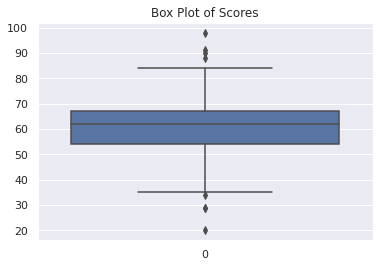

In [ ]:
#Code for Outlier Detection Using Interquartile Range (IQR)

sns.boxplot(data=scores_data).set(title="Box Plot of Scores")

In [ ]:
df_scores.describe()

,score,z_score
count,200.000000,2.000000e+02
mean,61.005000,-2.131628e-16
std,11.854434,1.000000e+00
min,20.000000,-3.459043e+00
25%,54.000000,-5.909181e-01
50%,62.000000,8.393484e-02
75%,67.000000,5.057179e-01
max,98.000000,3.120773e+00


In [ ]:
IQR = 67-54
lower_limit = 54 - 1.5*IQR
upper_limit = 67 + 1.5*IQR
print(upper_limit)
print(lower_limit)

86.5
34.5


In [ ]:
df_scores_filtered = df_scores[(df_scores['score']>lower_limit) & (df_scores['score']<upper_limit)]
print(df_scores_filtered)

     score   z_score
0     75.0  1.180571
1     56.0 -0.422205
2     67.0  0.505718
3     65.0  0.337005
4     63.0  0.168291
..     ...       ...
194   42.0 -1.603198
195   76.0  1.264928
196   67.0  0.505718
197   74.0  1.096214
199   53.0 -0.675275

[192 rows x 2 columns]


In [ ]:
q25,q75 = np.percentile(a = df_scores,q=[25,75])
IQR = q75 - q25
print(IQR)

61.91606516404945


In [ ]:
# Code for Outlier Detection Using Percentile
lower_limit, upper_limit = np.percentile(a=df_scores,q=[0.5,99.5])
print(upper_limit)
print(lower_limit)

90.005
-2.6998335925602515


In [ ]:
df_scores_filtered = df_scores[(df_scores['score']>lower_limit) & (df_scores['score']<upper_limit)]
print(df_scores_filtered)

     score   z_score
0     75.0  1.180571
1     56.0 -0.422205
2     67.0  0.505718
3     65.0  0.337005
4     63.0  0.168291
..     ...       ...
194   42.0 -1.603198
195   76.0  1.264928
196   67.0  0.505718
197   74.0  1.096214
199   53.0 -0.675275

[198 rows x 2 columns]


In [ ]:
df_scores_filtered = df_scores[(df_scores['score']>lower_limit) & (df_scores['score']<upper_limit)]
print(df_scores_filtered)

     score   z_score
0     75.0  1.180571
1     56.0 -0.422205
2     67.0  0.505718
3     65.0  0.337005
4     63.0  0.168291
..     ...       ...
194   42.0 -1.603198
195   76.0  1.264928
196   67.0  0.505718
197   74.0  1.096214
199   53.0 -0.675275

[198 rows x 2 columns]
